In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fe_gmx import AWH_Ensemble

In [2]:
awh_ensemble = AWH_Ensemble('./AWH')

                        :-) GROMACS - gmx awh, 2023 (-:

Executable:   /opt/tcbsys/gromacs/2023/gmx/AVX2_256/bin/gmx
Data prefix:  /opt/tcbsys/gromacs/2023/gmx/AVX2_256
Working dir:  /nethome/yzhuang/git_repo/binding-free-energy-with-gromacs/tutorials/awh/test/AWH/awh_result
Command line:
  gmx awh -f ../rep1/awh.edr -o awh.xvg -s ../rep1/awh.tpr -skip 10 -more

Opened ../rep1/awh.edr as single precision energy file
Reading file ../rep1/awh.tpr, VERSION 2023 (single precision)
Last energy frame read 2195 time 4390.000         

GROMACS reminds you: "Expertise is not inherently good." (Joe Jordan)



Found 44 awh_pmf files.
The latest awh_pmf file is ./AWH/awh_result/awh_t4300.xvg
The latest awh_pmf file was generated at 2023-06-20 14:57:50.731921
Found 4 walkers.
The latest walker was generated at 2023-06-20 14:57:26.148895
Generating pulling data...
Generating log data...
Generating PMF data...


Generating PMF data: 100%|██████████| 44/44 [00:02<00:00, 18.04it/s]


In [3]:
awh_ensemble.awh_log[0]

AWH_LOG(filename=./AWH/rep1/awh.log, index=0), covering_times=[], equlibrated_histogram_time=None, out_of_initial_stage_time=None

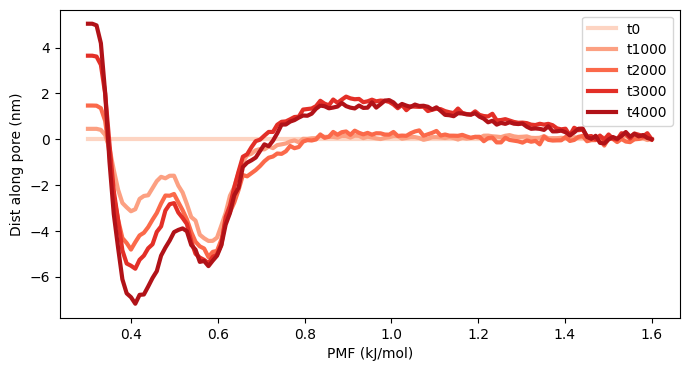

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Reds', n_colors=5)
fig, ax = plt.subplots(figsize=(8,4))

for time, awh_pmf in zip(awh_ensemble.awh_results.timeseries[-50::10],
                         awh_ensemble.awh_results.pmf[-50::10]):

    awh_r = awh_pmf[:, 0].T
    awh_fes = awh_pmf[:, 1].T
    #+ awh_pmf_r_bias
    awh_fes = awh_fes - awh_fes[-1]
    ax.plot(awh_r, awh_fes, label=time, lw=3)

ax.set_xlabel(f'PMF (kJ/mol)')
ax.set_ylabel('Dist along pore (nm)')
ax.legend()